## The Problem Statement

The goal here is to find the chances of admission of a candidate based on his/her GRE Score(out of 340), TOEFLT Score(out of 120), rating of the university(out of 5) in which he/she is trying to get admission, strength of SOP(out of 5), strength of Recommendation(out of 5), CGPA(out of 10) and the research experience(0 or 1).

In [1]:
# necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
df = pd.read_csv("Admission_Prediction.csv")

In [3]:
df.head() # checking the first 5 rows of the dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(500, 9)

In [5]:
df.info() #printing the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [60]:
df.isna().sum() #finding the count of missing values from different columns

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
df['GRE Score'].mode() # These 2 values are occuring more frequently in GRE column, pick any of them

0    312.0
1    324.0
dtype: float64

In [9]:
df['GRE Score'].fillna(df['GRE Score'].mode()[0],inplace=True)
#to replace the missing values in the 'GRE Score' column with the mode of the column
# Mode has been used here to replace the missing scores with the most occuring scores so that data follows general trend

In [10]:
df['TOEFL Score'].mode()

0    110.0
dtype: float64

In [15]:
df['TOEFL Score'].fillna(df['TOEFL Score'].mode()[0],inplace=True)
#to replace the missing values in the 'TOEFL Score' column with the mode of the column
# Mode has been used here to replace the missing scores with the most occuring scores so that data follows general trend

In [13]:
df['University Rating'].mean()

3.121649484536084

In [12]:
df['University Rating'].fillna(df['University Rating'].mean(),inplace=True)
#to replace the missing values in the 'University Rating' column with the mean of the column
# Mode has been used here to replace the missing scores with the mean so that data follows general trend

In [16]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [20]:
# dropping the 'Chance of Admit' and 'Serail number' as they are not going to be used as features for prediction
x = df.drop(['Chance of Admit','Serial No.'],axis='columns')

# 'Chance of Admit' is the target column which shows the probability of admission for a candidate
y = df['Chance of Admit']

In [21]:
x.head() # checking the transformed feature columns

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,312.0,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0


In [25]:
for column in x.columns:
    print(x[column])

0      337.0
1      324.0
2      312.0
3      322.0
4      314.0
       ...  
495    332.0
496    337.0
497    330.0
498    312.0
499    327.0
Name: GRE Score, Length: 500, dtype: float64
0      118.0
1      107.0
2      104.0
3      110.0
4      103.0
       ...  
495    108.0
496    117.0
497    120.0
498    103.0
499    113.0
Name: TOEFL Score, Length: 500, dtype: float64
0      4.0
1      4.0
2      3.0
3      3.0
4      2.0
      ... 
495    5.0
496    5.0
497    5.0
498    4.0
499    4.0
Name: University Rating, Length: 500, dtype: float64
0      4.5
1      4.0
2      3.0
3      3.5
4      2.0
      ... 
495    4.5
496    5.0
497    4.5
498    4.0
499    4.5
Name: SOP, Length: 500, dtype: float64
0      4.5
1      4.5
2      3.5
3      2.5
4      3.0
      ... 
495    4.0
496    5.0
497    5.0
498    5.0
499    4.5
Name: LOR, Length: 500, dtype: float64
0      9.65
1      8.87
2      8.00
3      8.67
4      8.21
       ... 
495    9.02
496    9.87
497    9.56
498    8.43
499    9

In [27]:
for column in x.columns:
    print(column)

GRE Score
TOEFL Score
University Rating
SOP
LOR
CGPA
Research


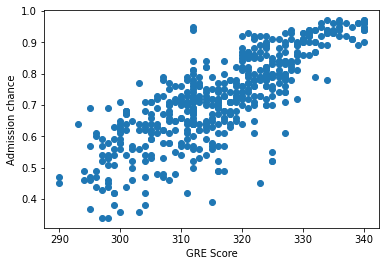

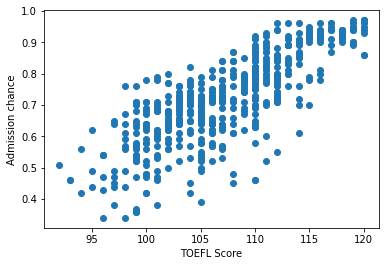

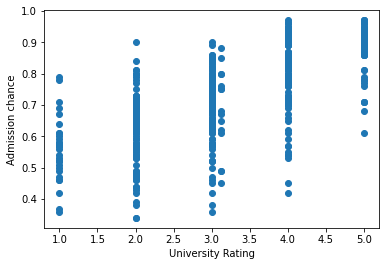

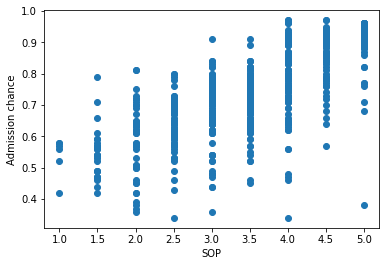

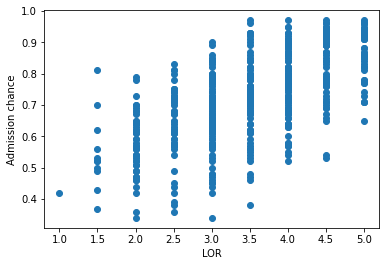

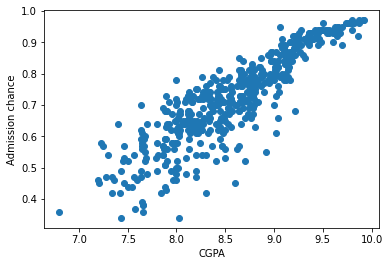

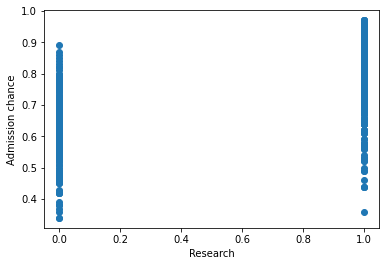

In [28]:
# showcasing the relationship between all the columns and the label
for column in x.columns:
    #if(column != ['Chance of Admit']):
        plt.scatter(x[column],y)
        plt.xlabel(column)
        plt.ylabel('Admission chance')
        plt.show()
        

In [61]:
# To be used only if you scale the data
from sklearn.preprocessing import StandardScaler
scaler_feature = StandardScaler()
scaler_label = StandardScaler()

scaled_data = scaler_feature.fit_transform(x)
scaled_data[0]     # looking at the dataset after scaling

array([1.85052822, 1.77547686, 0.77890565, 1.13735981, 1.09894429,
       1.77680627, 0.88640526])

In [40]:
type(scaled_data)

numpy.ndarray

In [36]:
# splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.33,random_state=100)

#test_size = 0.33 means 33% of x dataframe data , I'm going to use as test data : 500 *0.33 = 165 rows will be the size of test dataset
# random_state =100 means I'm going to take test data from row number 100(100th row to 265th(100+165) row), rows from x data frame to be used for testing

In [39]:
type(train_y)

pandas.core.series.Series

In [41]:
print(train_x.shape)
print(test_x.shape)

(335, 7)
(165, 7)


In [37]:
# fitting the data to the linear model
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(train_x,train_y)


LinearRegression()

In [62]:
test_x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
69,328.0,115.0,4.0,4.5,4.0,9.16,1
29,310.0,99.0,2.0,1.5,2.0,7.30,0
471,311.0,103.0,3.0,2.0,4.0,8.09,0
344,295.0,96.0,2.0,1.5,2.0,7.34,0
54,322.0,110.0,3.0,3.0,3.5,8.00,0
...,...,...,...,...,...,...,...
5,330.0,115.0,5.0,4.5,3.0,9.34,1
269,308.0,110.0,4.0,4.5,5.0,8.34,0
267,314.0,107.0,3.0,3.0,3.5,8.17,1
456,299.0,100.0,2.0,2.0,2.0,7.88,0


In [46]:
test_y

69     0.78
29     0.54
471    0.64
344    0.47
54     0.70
       ... 
5      0.90
269    0.77
267    0.73
456    0.51
127    0.78
Name: Chance of Admit, Length: 165, dtype: float64

In [47]:
reg.predict(test_x) # predict y for given x

array([0.85868396, 0.47100161, 0.6280096 , 0.44578053, 0.64598598,
       0.85398867, 0.58423805, 0.6708053 , 0.81576593, 0.68391898,
       0.66322789, 0.60710496, 0.89390747, 0.76122405, 0.63653857,
       0.50101692, 0.5932031 , 0.74550918, 0.56026094, 0.71477719,
       0.89825968, 0.60985982, 0.85096431, 0.82326697, 0.99808338,
       0.60354515, 0.68321824, 0.93662411, 0.87713203, 0.70043558,
       0.78420399, 0.85380635, 0.7502154 , 0.55268936, 0.73961435,
       0.78262859, 0.79567973, 0.57756558, 0.54007331, 0.70184561,
       0.94815906, 0.58454502, 0.83942492, 0.78608391, 0.8110905 ,
       0.54729563, 0.59557674, 0.87410501, 0.95154098, 0.59880994,
       0.81659257, 0.70920574, 0.80814867, 0.99084397, 0.64359316,
       0.85476613, 0.6179743 , 0.89711609, 0.76941624, 0.73447114,
       0.68813814, 0.62390397, 0.47604256, 0.8832669 , 0.64759615,
       0.68476495, 0.70437717, 0.45943371, 0.84033595, 0.84308359,
       0.92763891, 0.77439541, 0.65730255, 0.83786836, 0.64625

In [44]:
# calculating the accuracy of the model
from sklearn.metrics import r2_score
score = r2_score(reg.predict(test_x),test_y) # r2_score(y_true,y_pred)
score

0.8076993525686706

In [50]:
reg.coef_
# prints slope of each feature column

array([ 0.00132009,  0.00352893,  0.00379571, -0.00061289,  0.01801671,
        0.12917656,  0.02540324])

In [51]:
reg.intercept_

-1.2732848703680322

In [53]:
## predict the chances of admission for the following eaxmple
#[GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research]=
#[300,110,5,5,5,10,1]

reg.predict([[300,110,5,5,5,10,1]])

# There is a 0.93 probability of getting admission

array([0.93409108])

In [54]:
# saving the model to local file system
filename = 'finalized_model.pickle'
pickle.dump(reg, open(filename,'wb')) # reg is my model

# now, our model is dumped into a file called filename

In [57]:
# we can also make predictions using saved model:

loaded_model = pickle.load(open(filename,'rb'))
loaded_model.predict([[300,110,5,5,5,10,1]])

array([0.93409108])

In [58]:
loaded_model.predict([[240,67,5,5,5,10,0]])

array([0.67773839])